<a href="https://colab.research.google.com/github/siddhi5386/face-recognition-my-family-/blob/master/face_recognition(own).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dlib

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 66kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=79e04b96f80b39cc3acbdce3ae05616dcb41541b6f13727113167ea26f5ca652
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [ ]:
# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images("/content/drive/My Drive/deep learning/face_recog_myown/dataset"))
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

[INFO] quantifying faces...


In [ ]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]

	# load the input image and convert it from BGR (OpenCV ordering) to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
	# detect the (x, y)-coordinates of the bounding boxes corresponding to each face in the input image

	boxes = face_recognition.face_locations(rgb,
		model="hog")
	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)
	# loop over the encodings
	for encoding in encodings:

		# add each encoding + name to our set of known names and encodings

		knownEncodings.append(encoding)
		knownNames.append(name)
  
# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open("myownencodings", "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] processing image 1/301
[INFO] processing image 2/301
[INFO] processing image 3/301
[INFO] processing image 4/301
[INFO] processing image 5/301
[INFO] processing image 6/301
[INFO] processing image 7/301
[INFO] processing image 8/301
[INFO] processing image 9/301
[INFO] processing image 10/301
[INFO] processing image 11/301
[INFO] processing image 12/301
[INFO] processing image 13/301
[INFO] processing image 14/301
[INFO] processing image 15/301
[INFO] processing image 16/301
[INFO] processing image 17/301
[INFO] processing image 18/301
[INFO] processing image 19/301
[INFO] processing image 20/301
[INFO] processing image 21/301
[INFO] processing image 22/301
[INFO] processing image 23/301
[INFO] processing image 24/301
[INFO] processing image 25/301
[INFO] processing image 26/301
[INFO] processing image 27/301
[INFO] processing image 28/301
[INFO] processing image 29/301
[INFO] processing image 30/301
[INFO] processing image 31/301
[INFO] processing image 32/301
[INFO] processing

In [ ]:
# import the necessary packages
import face_recognition
import argparse
import pickle
import cv2

In [ ]:
# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open("/content/myownencodings", "rb").read())
# load the input image and convert it from BGR to RGB
image = cv2.imread("/content/drive/My Drive/deep learning/face_recog_myown/full family.jpeg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# detect the (x, y)-coordinates of the bounding boxes corresponding to each face in the input image, then compute the facial embeddings for each face
print("[INFO] recognizing faces...")

boxes = face_recognition.face_locations(rgb,
	model="hog")

encodings = face_recognition.face_encodings(rgb, boxes)
# initialize the list of names for each face detected
names = []

[INFO] loading encodings...
[INFO] recognizing faces...


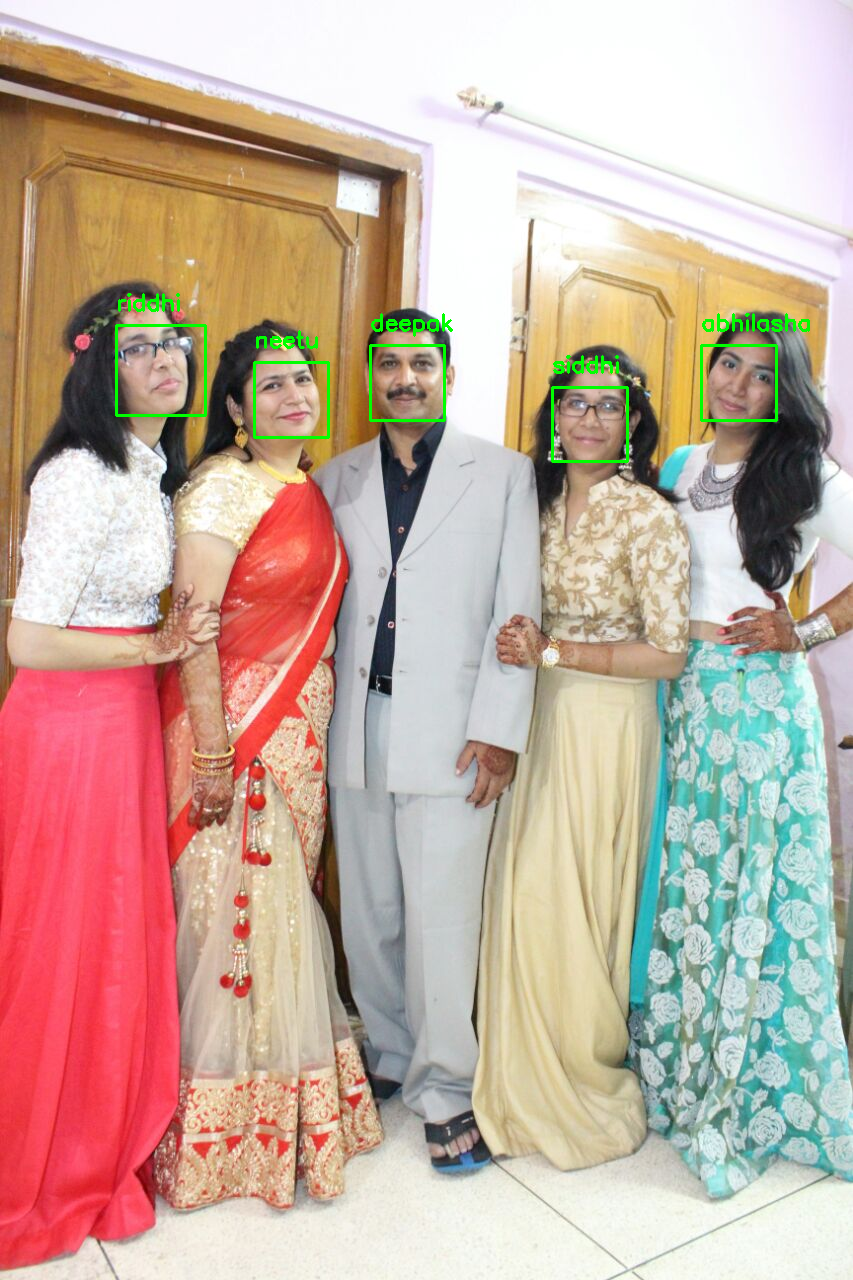

-1

In [ ]:
from google.colab.patches import cv2_imshow

# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"

	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a dictionary to count the total number of times each face was matched

		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}

		# loop over the matched indexes and maintain a count for each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
		# determine the recognized face with the largest number of votes (note: in the event of an unlikely tie Python will select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)
 
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.75, (0, 255, 0), 2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)